In [49]:
from fed_kmeans import client_V2, server_V2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
## create datasets
sample_origins = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])

rng = np.random.default_rng(seed = 42)

# dset_1 = np.concatenate(rng.normal(loc = sample_origins[3,:]))

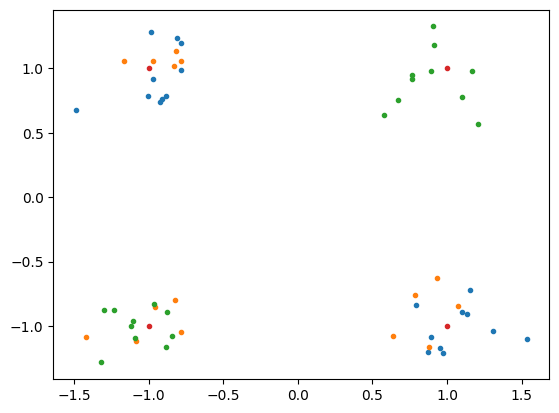

In [51]:
dset_11 = rng.normal(loc = sample_origins[2,:],scale = 0.25, size = (10,2))
dset_12 = rng.normal(loc = sample_origins[1,:], scale = 0.25, size = (10,2))
dset_1 = np.concatenate((dset_11, dset_12))

dset_21 = rng.normal(loc = sample_origins[2,:],scale = 0.25, size = (5,2))
dset_22 = rng.normal(loc = sample_origins[1,:], scale = 0.25, size = (5,2))
dset_23 = rng.normal(loc = sample_origins[3,:], scale = 0.25, size = (5, 2))
dset_2 = np.concatenate((dset_21, dset_22, dset_23))

dset_31 = rng.normal(loc = sample_origins[3,:],scale = 0.25, size = (10,2))
dset_32 = rng.normal(loc = sample_origins[0,:], scale = 0.25, size = (10,2))
dset_3 = np.concatenate((dset_31, dset_32))


plt.plot(dset_1[:,0], dset_1[:,1], '.')
plt.plot(dset_2[:,0], dset_2[:,1], '.')
plt.plot(dset_3[:,0], dset_3[:,1], '.')

plt.plot(sample_origins[:,0], sample_origins[:,1], ".")

## client plots

Text(0.5, 1.0, 'client 1')

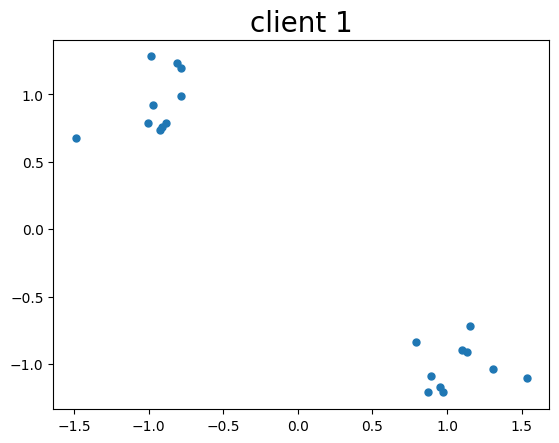

In [52]:
# plt.rc('figure', titlesize=)  # fontsize of the figure title
plt.plot(dset_1[:,0], dset_1[:,1], '.', ms = 10)
plt.title('client 1', fontdict = {'fontsize' : 20})

Text(0.5, 1.0, 'client 2')

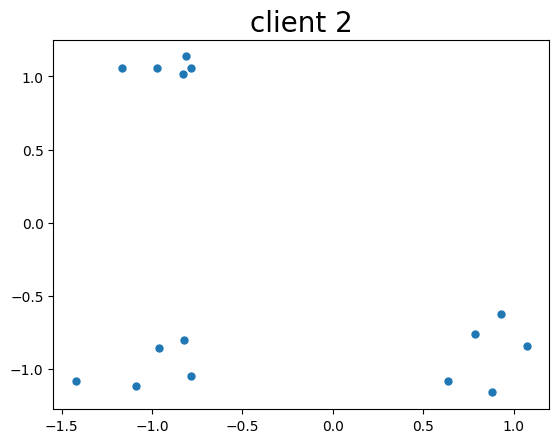

In [53]:
plt.plot(dset_2[:,0], dset_2[:,1], '.', ms = 10)
plt.title('client 2', fontdict = {'fontsize' : 20})

Text(0.5, 1.0, 'client 3')

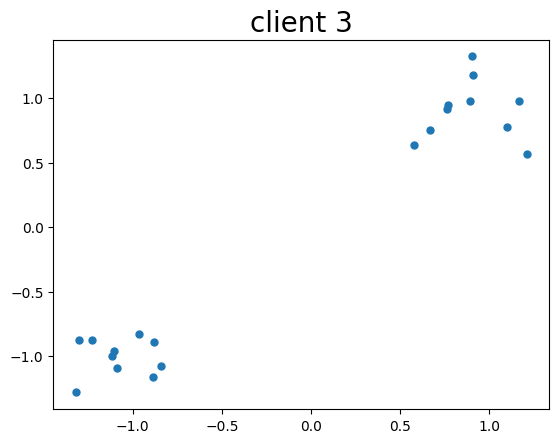

In [54]:
plt.plot(dset_3[:,0], dset_3[:,1], '.', ms = 10)
plt.title('client 3', fontdict = {'fontsize' : 20})

## algorithm loop (unraveled)

In [55]:
dsets = [dset_1, dset_2, dset_3]
n_clients = 3
n_global = 4


server = server_V2(n_global)
clients = []
for i in range(n_clients):
    client = client_V2(dsets[i], None, n_global)
    clients.append(client)

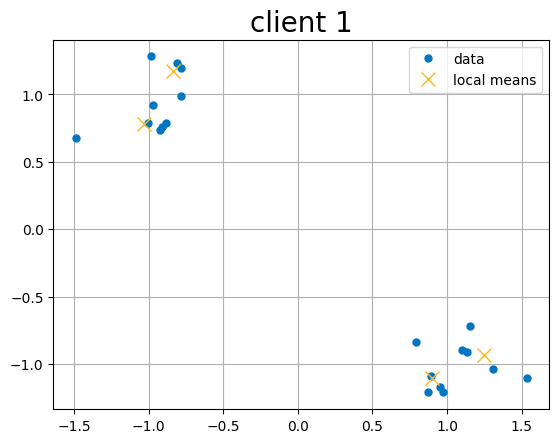

In [58]:
client_id = 0
mean_colors = [(255, 184, 28), (224, 60, 49), (239, 96, 163)]
c_conv = [tuple(ti / 255 for ti in tup) for tup in mean_colors]
data_color = (0, 118/255, 194/255)

plt.plot(dsets[client_id][:,0], dsets[client_id][:,1], ".", label = "data", ms = 10, c = tuple(ti /255 for ti in (0, 118, 194)))
plt.plot(clients[client_id].means[:,0], clients[client_id].means[:,1], "x", label = "local means", ms =10, c = c_conv[client_id])
plt.legend()
plt.title(f'client {client_id + 1}', fontdict = {'fontsize' : 20})
plt.grid()

In [59]:
# collect local cluster means at server
local_clusters = []
cluster_sizes = []
for client in clients:
    local_clusters.append(client.means)
    cluster_sizes.append(client.sample_amts)
    
local_cluster_arr = np.concatenate(local_clusters)
cluster_sizes = np.concatenate(cluster_sizes)


Text(0.5, 1.0, 'server')

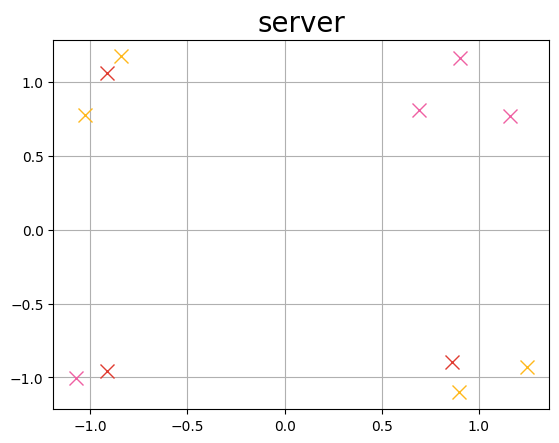

In [60]:
# bit of a hack to plot it like this, but helps with the colors
for i, client in enumerate(clients):
    plt.plot(client.means[:,0], client.means[:,1], "x", ms = 10, c = c_conv[i] )
    
plt.grid()   
plt.title("server", fontdict = {'fontsize' : 20})

Text(0.5, 1.0, 'server')

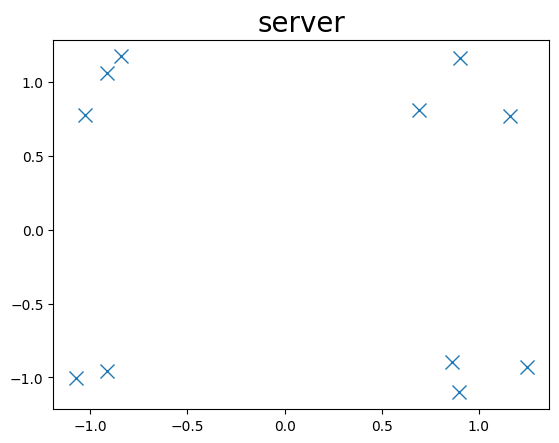

In [71]:
plt.plot(local_cluster_arr[:,0], local_cluster_arr[:,1], "x", ms = 10)
plt.title("server", fontdict = {'fontsize' : 20})

In [61]:
# run kmeans on server to unify local cluster means
global_clusters = server.aggregate(local_cluster_arr, cluster_sizes)

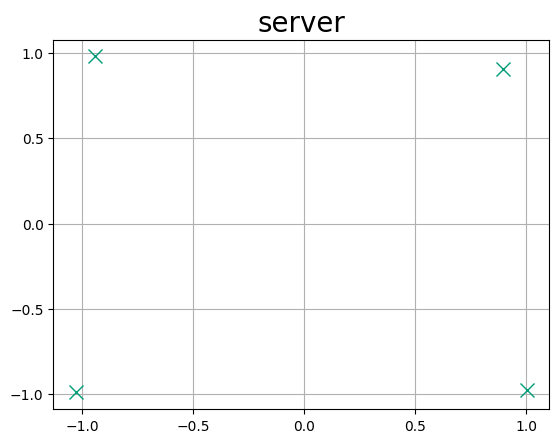

In [66]:
server_color = tuple(ti/255 for ti in (0, 155, 119))
plt.plot(global_clusters[:,0], global_clusters[:,1], "x", ms = 10, c = server_color)
plt.title("server", fontdict = {'fontsize' : 20})
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid()

In [67]:
# 'send' global clusters to clients
for client in clients:
    client.means = np.copy(global_clusters)   

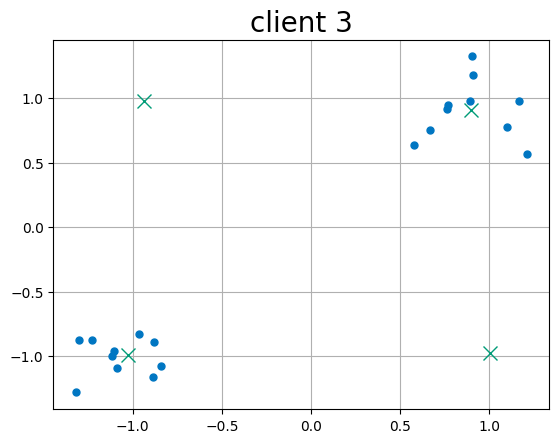

In [70]:
client_id = 2
client = clients[client_id]

plt.plot(client.data[:,0], client.data[:,1], ".", ms= 10, c = data_color)
plt.plot(client.means[:,0], client.means[:,1], "x", ms = 10, c= server_color)
plt.title(f'client {client_id + 1}', fontdict = {'fontsize' : 20})
plt.grid()

In [71]:
## discard empty clusters
for client in clients:
    client.discard_empty_clusters(score = False)

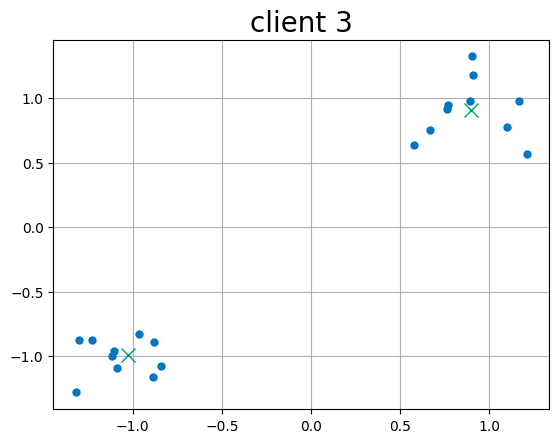

In [74]:
client_id = 2
client = clients[client_id]

plt.plot(client.data[:,0], client.data[:,1], ".", ms = 10, c = data_color)
plt.plot(client.means[:,0], client.means[:,1], "x", ms = 10, c= server_color)
plt.title(f'client {client_id + 1}', fontdict = {'fontsize' : 20})
plt.grid()

In [75]:
## run kmeans locally
for client in clients:
    client.km_local()

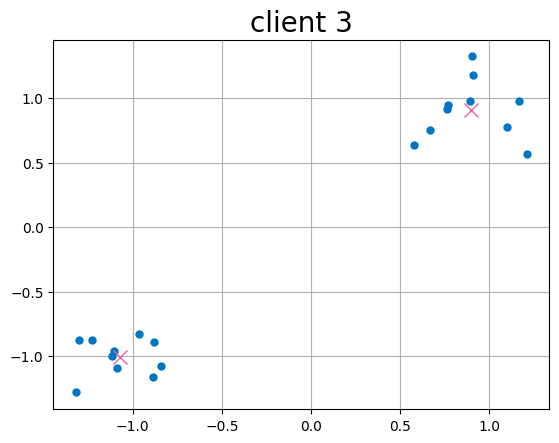

In [78]:
client_id = 2
client = clients[client_id]

plt.plot(client.data[:,0], client.data[:,1], ".", ms = 10, c = data_color)
plt.plot(client.means[:,0], client.means[:,1], "x", ms = 10,c =  c_conv[client_id])
plt.title(f'client {client_id + 1}', fontdict = {'fontsize' : 20})
plt.grid()